# Netflix 1990s Movies EDA
<center><img src="redpopcorn.jpg" width="400"></center>


## Introduction

Netflix, founded in 1997, started as a DVD rental company and evolved into one of the largest streaming platforms globally. 
In this project, we aim to analyze Netflix's 1990s movies to identify trends in genres, countries of origin, and movie durations. 
This will help us understand the nostalgic flavor of 90s cinema and spot patterns relevant to modern production ideas.


## 1. Data Loading and Overview

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
netflix_df = pd.read_csv('netflix_data.csv')

# Display first few rows
netflix_df.head()


,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


In [3]:

# Basic information about the dataset
netflix_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB


In [5]:

# Check missing values
netflix_df.isnull().sum()


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
duration        0
description     0
genre           0
dtype: int64

## 2. Filtering 1990s Movies

In [7]:

# Filter for Movies only and for release years between 1990-1999
netflix_90s = netflix_df[(netflix_df['type'] == 'Movie') & 
                         (netflix_df['release_year'] >= 1990) & 
                         (netflix_df['release_year'] <= 1999)].copy()
netflix_90s.head()


,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
6,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,119,After one of his high school students attacks ...,Dramas
118,s167,Movie,A Dangerous Woman,Stephen Gyllenhaal,"Debra Winger, Barbara Hershey, Gabriel Byrne, ...",United States,"April 1, 2018",1993,101,At the center of this engrossing melodrama is ...,Dramas
145,s211,Movie,A Night at the Roxbury,John Fortenberry,"Will Ferrell, Chris Kattan, Dan Hedaya, Molly ...",United States,"December 1, 2019",1998,82,"After a run-in with Richard Grieco, dimwits Do...",Comedies
167,s239,Movie,A Thin Line Between Love & Hate,Martin Lawrence,"Martin Lawrence, Lynn Whitfield, Regina King, ...",United States,"December 1, 2020",1996,108,When a philandering club promoter sets out to ...,Comedies
194,s274,Movie,Aashik Awara,Umesh Mehra,"Saif Ali Khan, Mamta Kulkarni, Mohnish Bahl, S...",India,"June 1, 2017",1993,154,"Raised by a kindly thief, orphaned Jimmy goes ...",Dramas


In [9]:

# How many 1990s movies?
len(netflix_90s)


183

## 3. Top Genres of 1990s Movies

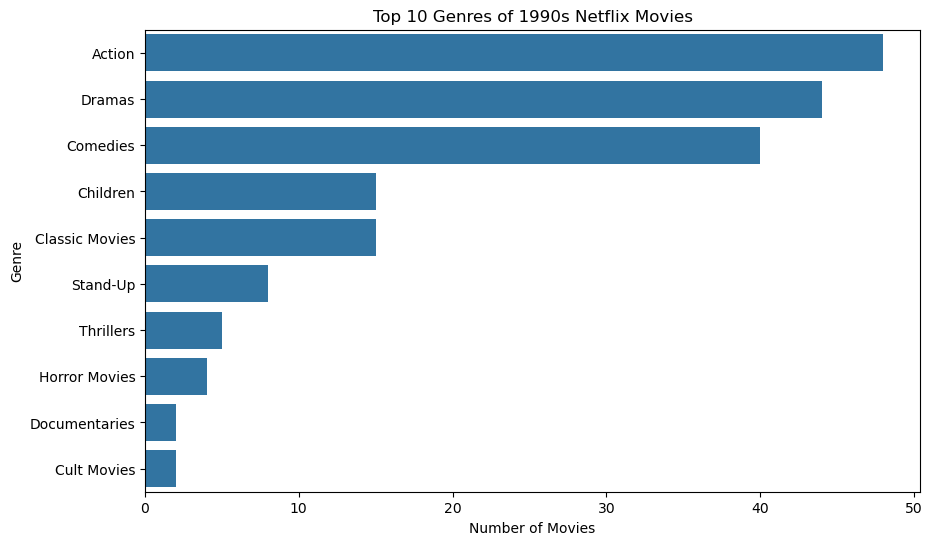

In [11]:

# Top genres
plt.figure(figsize=(10,6))
sns.countplot(y='genre', data=netflix_90s, order=netflix_90s['genre'].value_counts().index[:10])
plt.title('Top 10 Genres of 1990s Netflix Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()


## 4. Top Countries Producing 1990s Movies

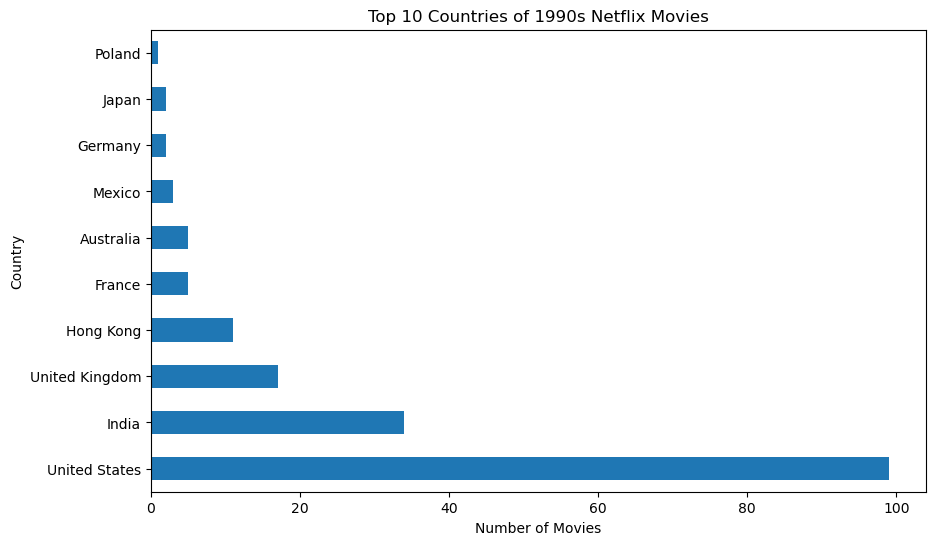

In [13]:

# Top producing countries
plt.figure(figsize=(10,6))
netflix_90s['country'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Countries of 1990s Netflix Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Country')
plt.show()


## 5. Duration Analysis

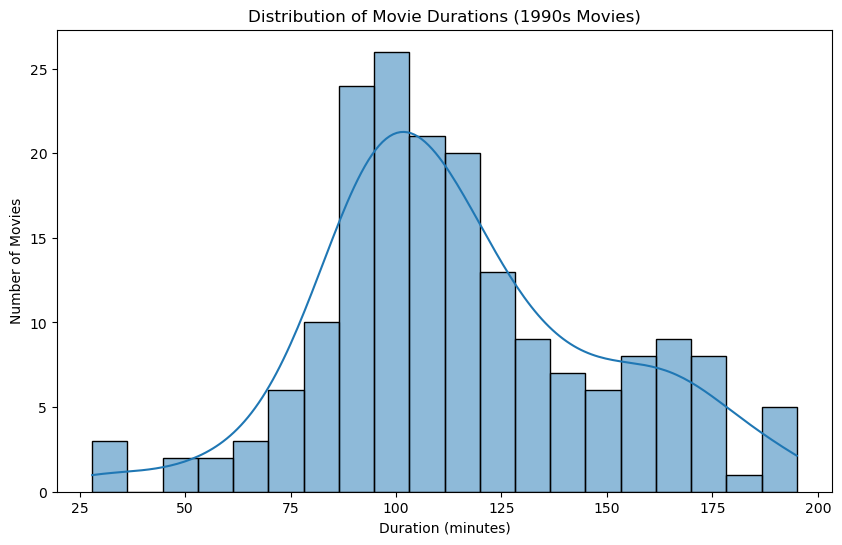

115.12021857923497

In [15]:

# Duration cleaning
netflix_90s['duration'] = netflix_90s['duration'].astype(str)
netflix_90s['duration_minutes'] = netflix_90s['duration'].str.extract(r'(\d+)').astype(float)

# Plot duration distribution
plt.figure(figsize=(10,6))
sns.histplot(netflix_90s['duration_minutes'].dropna(), bins=20, kde=True)
plt.title('Distribution of Movie Durations (1990s Movies)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()

# Average movie duration
netflix_90s['duration_minutes'].mean()



## Conclusion

- The 1990s featured a wide range of genres, with Drama and Action leading.
- Most 1990s Netflix movies originated from the USA, followed by India and the UK.
- The average 1990s movie duration was around 90-100 minutes.
- 90s cinema offers rich opportunities for nostalgic and retro-themed productions.

---
